## Assignment 3
#### Ostapovich Oleg

# Task 1
### Calculating and plotting position, velocity, and acceleration

In [109]:
import numpy as np
import random
from matplotlib.pyplot import*

figsize = (20,11)

In [110]:
# creating random array of joint's data
# if execute this code few times it is possible to find interesting combinations of triangular and trapezoid profiles
qs = np.zeros((6,4)) # first column has zeros
qs[:,1] = [random.randint(10,90) for i in qs[:,1]] # second column numbers around 10-90
qs[:,2] = [random.randint(5,10) for i in qs[:,2]] # third column numbers around 5-10
qs[:,3] = [random.randint(3,6) for i in qs[:,3]] # fourth column numbers around 3-6
print(qs)

[[ 0. 10.  7.  6.]
 [ 0. 16.  9.  5.]
 [ 0. 66.  5.  3.]
 [ 0. 14.  8.  4.]
 [ 0. 84.  5.  4.]
 [ 0. 90. 10.  6.]]


In [111]:
t0 = 0
times = []
for i in qs:
    q0, qf , dq_m, ddq_m = i
    dq = qf-q0
    #triangular check
    c = np.sqrt(abs(dq*ddq_m))

    if c <= dq_m:
      t1 = np.sqrt(abs(dq/ddq_m))
      T = t1
      tf = 2*t1
    else:
      t1 = dq_m/ddq_m
      T = dq/dq_m
      tf = T+t1
    times.append([t0,t1,T,tf])
times = np.array(times)
times# matrix of time

array([[ 0.        ,  1.16666667,  1.42857143,  2.5952381 ],
       [ 0.        ,  1.78885438,  1.78885438,  3.57770876],
       [ 0.        ,  1.66666667, 13.2       , 14.86666667],
       [ 0.        ,  1.87082869,  1.87082869,  3.74165739],
       [ 0.        ,  1.25      , 16.8       , 18.05      ],
       [ 0.        ,  1.66666667,  9.        , 10.66666667]])

In [112]:
pltmtx = [0,0,0,0,0,0]
for k in range(6):
    t0,t1,T,tf = times[k]
    q0, qf , dq_m, ddq_m = qs[k]
    t = np.linspace(t0,tf, 500)
    q = []
    v = []
    a = []

    for i in t:

      if i <=t1:
        qi = q0 + (0.5*ddq_m*(i-t0)**2)
        q02 = qi
        vi = ddq_m*i
        v02 = vi
        ai = ddq_m

      elif i > t1 and i <= T:
        vi = dq_m
        qi =  q02 + v02*(i-t1)
        ai = 0

      elif i > T:
        vi = ddq_m*(tf-i)
        qi = qf - (0.5*ddq_m*(i-tf)**2)
        ai = -ddq_m

      q.append(qi)
      v.append(vi)
      a.append(ai)
    pltmtx[k] = [t,q,v,a]

In [113]:
# plotting functions
def plotQ(allparams):
    t0,t1,T,tf,t,q,v,a,q0,qf,dq_m,ddq_m,i = allparams
    subplot(6, 3, 3*i+1)
    plot(t,q, linewidth=2, label="q")
    xlabel('t (s)', fontsize=18)
    ylabel(r'q(t) ($\degree$)', fontsize=18)
    grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
    grid(True)
    xlim([0,tf])
    ylim([0,max(q)+10])
    hlines(qf, 0,tf, linestyles='--', color='r', label=r"$q_{2}$")
    vlines([t1,T], 0, max(q)+10, linestyles='--', linewidth=2)
    legend()

def plotV(allparams):
    t0,t1,T,tf,t,q,v,a,q0,qf,dq_m,ddq_m,i = allparams
    subplot(6, 3, 3*i+2)
    plot(t,v, linewidth=2, label="v")
    xlabel('t (s)', fontsize=18)
    ylabel(r'v(t) ($\degree$/s)', fontsize=18)
    grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
    grid(True)
    xlim([0,tf])
    ylim([0,dq_m+1])
    hlines(dq_m, 0,tf, linestyles='--', color='r', label=r"$v_{max}$")
    vlines([t1,T], 0, max(q), linestyles='--', linewidth=2)
    legend()

def plotA(allparams):
    t0,t1,T,tf,t,q,v,a,q0,qf,dq_m,ddq_m,i = allparams
    subplot(6, 3, 3*i+3)
    plot(t,a, linewidth=3, label="a")
    xlabel('t (s)', fontsize=18)
    ylabel(r'a(t) ($\degree^2$/s)', fontsize=18)
    grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
    grid(True)
    xlim([0,tf])
    ylim([min(a)-1,max(a)+1])
    vlines([t1,T], min(a)-1, max(a)+1, linestyles='--', linewidth=2)
    legend()

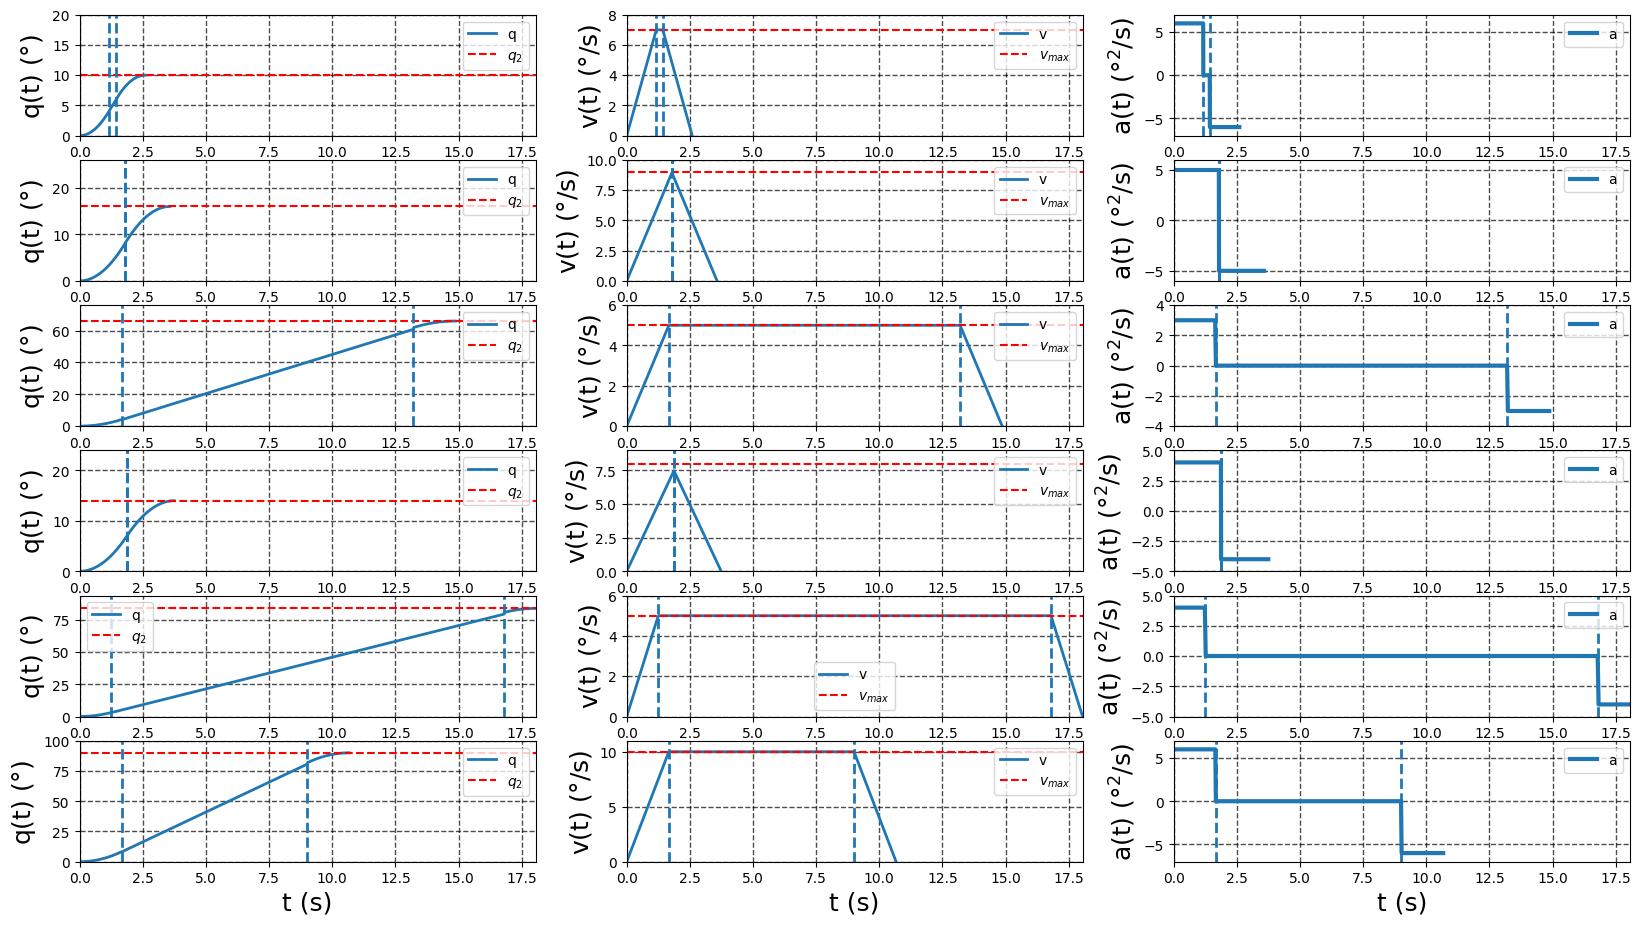

In [114]:
figure(figsize=figsize)
for i in range(6):
    # just coupling all variables in one list
    t0,t1,T,tf = times[i]
    t,q,v,a = pltmtx[i]
    q0, qf , dq_m, ddq_m = qs[i]
    tf = max(times[:,3]) # final time is same for every plot
    allparams = [t0,t1,T,tf,t,q,v,a,q0,qf,dq_m,ddq_m,i]
    # and plotting
    plotQ(allparams)
    plotV(allparams)
    plotA(allparams)

# Task 2
### Synchronize my 6 joints to start and end motion at the same time.

In [115]:
t0,t1,dwell,tf = max(times[:,0]), max(times[:,1]), max(times[:,2]-times[:,1]), max(times[:,3])
T = dwell + t1
tf = T + t1
print('Synchronized rise time: {}s'.format(round(t1)))
print('Synchronized dwell time: {}s'.format(round(dwell)))
print('Synchronized trajectory time = {} + {} + {} = {}s'.format(round(t1),round(dwell),round(t1),round(tf)))
time = np.array([t0,t1,T,tf])
time.reshape(1,-1) # time matrix

Synchronized rise time: 2s
Synchronized dwell time: 16s
Synchronized trajectory time = 2 + 16 + 2 = 19s


array([[ 0.        ,  1.87082869, 17.42082869, 19.29165739]])

In [116]:
#recalculate velocity and acceleration parameters
for j, i in enumerate(qs):
    dq_m = (i[1]-i[0])/T
    ddq_m = dq_m/t1
    qs[j] = [qs[j,0], qs[j,1], dq_m, ddq_m]
print(qs)

[[ 0.         10.          0.57402551  0.30682954]
 [ 0.         16.          0.91844081  0.49092726]
 [ 0.         66.          3.78856834  2.02507496]
 [ 0.         14.          0.80363571  0.42956135]
 [ 0.         84.          4.82181425  2.57736813]
 [ 0.         90.          5.16622955  2.76146585]]


In [117]:
pltmtx = [0,0,0,0,0,0]
t = np.linspace(t0,tf, 500)
t0,t1,T,tf = time
for k in range(6):
    q0, qf , dq_m, ddq_m = qs[k]
    q = []
    v = []
    a = []

    for i in t:

      if i <=t1:
        qi = q0 + (0.5*ddq_m*(i-t0)**2)
        q02 = qi
        vi = ddq_m*i
        v02 = vi
        ai = ddq_m

      elif i > t1 and i <= T:
        vi = dq_m
        qi =  q02 + v02*(i-t1)
        ai = 0

      elif i > T:
        vi = ddq_m*(tf-i)
        qi = qf - (0.5*ddq_m*(i-tf)**2)
        ai = -ddq_m

      q.append(qi)
      v.append(vi)
      a.append(ai)
    pltmtx[k] = [t,q,v,a]

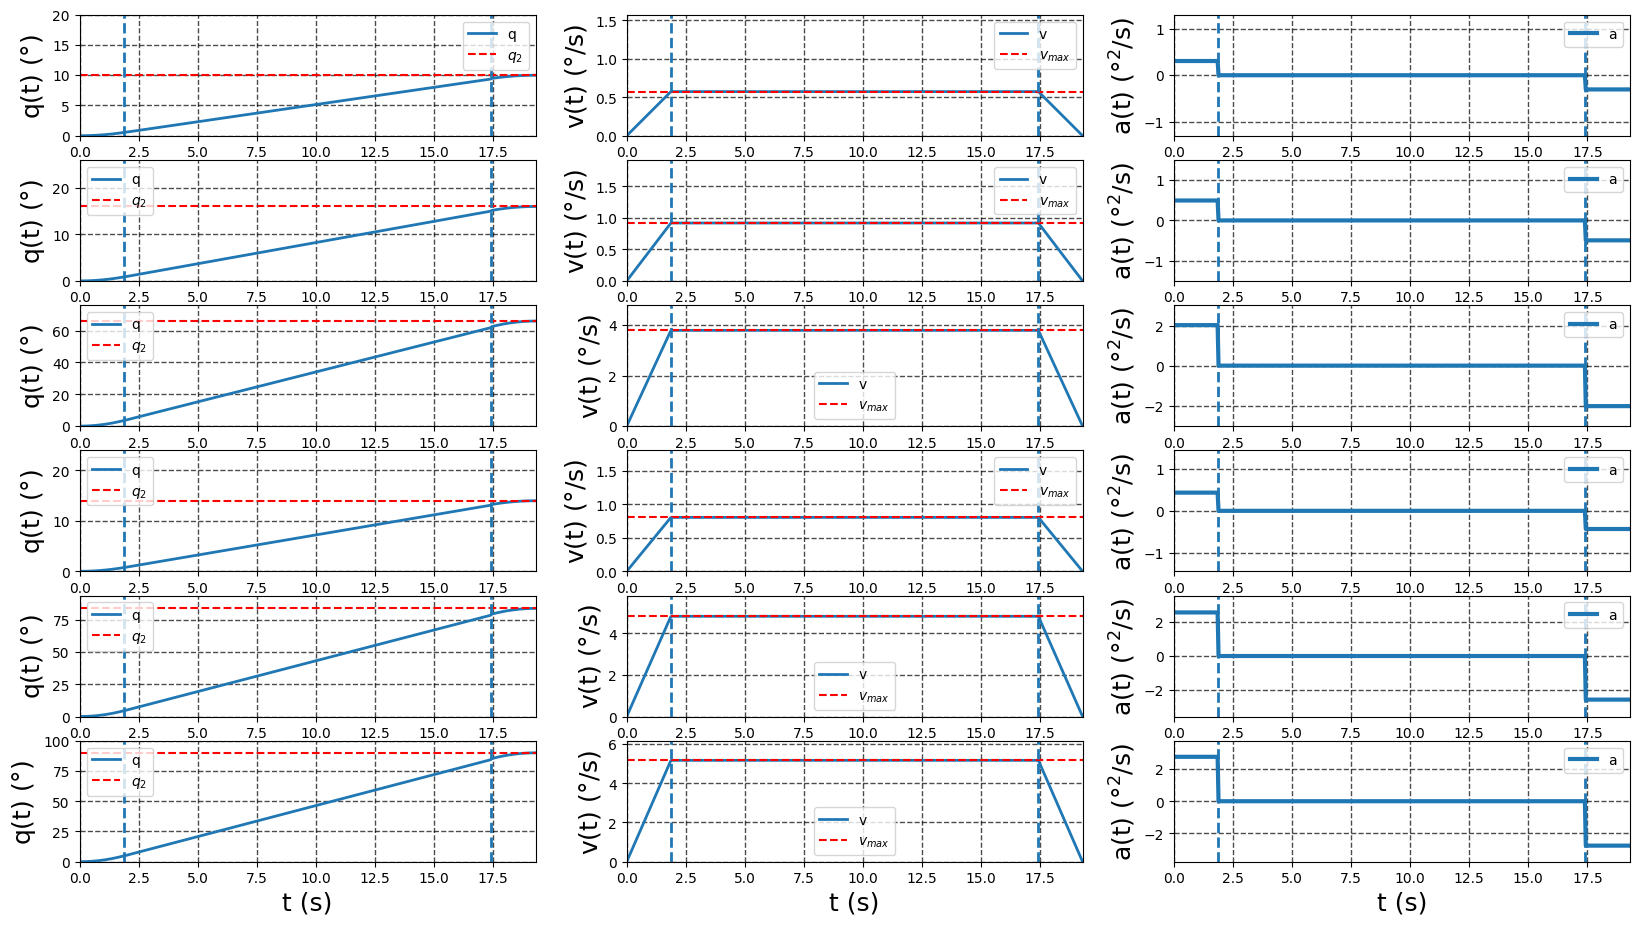

In [118]:
figure(figsize=figsize)
t0,t1,T,tf = time
for i in range(6):
    # just coupling all variables in one list
    t,q,v,a = pltmtx[i]
    q0, qf , dq_m, ddq_m = qs[i]
    allparams = [t0,t1,T,tf,t,q,v,a,q0,qf,dq_m,ddq_m,i]
    # and plotting
    plotQ(allparams)
    plotV(allparams)
    plotA(allparams)
allparams_sync = allparams.copy() # Let's save allparams for future use in task 4

# Task 3
### Frequency = 20Hz. Calculate propagated error in end-effector position

#### Example with 1Hz frequency to describe my solution

In [119]:
f = 1
plot_frequency = [0]*(round(tf/f)+10) # Same as linspace above
for i in range(1,len(plot_frequency)):
    plot_frequency[i] = plot_frequency[i-1]+f # Filling linspace with numbers

In [120]:
# calculating velocity
v_f = []
for j, i in enumerate(plot_frequency):
    vi = ddq_m*i
    if i > t1+f and i <= T+f:
        vi = v_f[-1]
    elif i > T:
        vi = v_f[j-1] - v_f[1]
    v_f.append(vi)

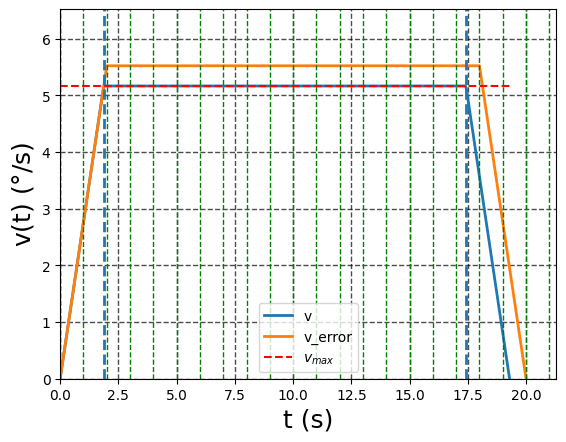

In [121]:
plot(t,v, linewidth=2, label="v")
plot(plot_frequency,v_f, linewidth=2, label="v_error")
xlabel('t (s)', fontsize=18)
ylabel(r'v(t) ($\degree$/s)', fontsize=18)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0,tf+2])
ylim([0,max(v_f)+1])
hlines(dq_m, 0,tf, linestyles='--', color='r', label=r"$v_{max}$")
vlines([t1,T], 0, max(q), linestyles='--', linewidth=2)
vlines(plot_frequency, 0, max(q), linestyles='--',color='g', linewidth=1)
legend()
show()

In [122]:
for i in v_f:
    if i < 0:
        tf_f = plot_frequency[v_f.index(i)]
        break
print(tf_f) # Time after intersection with 0

for i in v_f:
    if i == max(v_f):
        t1_f = plot_frequency[v_f.index(i)]
        break
print(t1_f) # T1 time

21
2


In [123]:
# now it is possible to find trapezoid area that is our rotation
(tf_f - t1_f)*max(v_f)

104.93570236270823

In [124]:
# let's find error by comparing trapezoid areas
(tf_f - t1_f)*max(v_f) - qs[5,1] # qs[5,1] is rotation a.k.a. trapezoid area from first matrix in this file

14.935702362708227

#### Solution for task 3

In [125]:
# Now i simply implement this code for every joint and summarize errors
mtx = [0,0,0,0,0,0]
f = 1/20
plot_frequency = [0]*(round(tf/f)+10)
for i in range(1,len(plot_frequency)):
    plot_frequency[i] = plot_frequency[i-1]+f
t0,t1,T,tf = time
for k in range(6):
    q0, qf , dq_m, ddq_m = qs[k]
    v_f = []
    for j, i in enumerate(plot_frequency):
        vi = ddq_m*i
        if i > t1+f and i <= T+f:
            vi = v_f[-1]
        elif i > T:
            vi = v_f[j-1] - v_f[1]
        v_f.append(vi)

    for i in v_f:
        if i < 0:
            tf_f = plot_frequency[v_f.index(i)]
            break

    for i in v_f:
        if i == max(v_f):
            t1_f = plot_frequency[v_f.index(i)]
            break
    error = (tf_f - t1_f)*max(v_f) - qs[k,1]
    mtx[k] = error

In [126]:
sum(mtx) #error

5.465918755265413

# Task 4
### Synchronized trajectories for numerical control

In [127]:
f = 1/20
plot_frequency = [0]*(round(tf/f)+10)
for i in range(1,len(plot_frequency)):
    plot_frequency[i] = plot_frequency[i-1]+f

In [128]:
# expand synchronized time even more
t0_num = time[0]
x = plot_frequency - time[1]
x = min(el for el in x if el > 0)
t1_num = t1 + x
y = plot_frequency - time[2]
y = min(el for el in y if el > 0)
T_num = T + y
z = plot_frequency - time[3]
z = min(el for el in z if el > 0)
tf_num = tf + z
time_num = np.array([t0_num,t1_num,T_num,tf_num])

In [129]:
# visualizing what happened
import pandas
pandas.DataFrame({'Synchronized time:':time, 'Synchronized for numerical control:':time_num}).T

,0,1,2,3
Synchronized time:,0.0,1.870829,17.420829,19.291657
Synchronized for numerical control:,0.0,1.900000,17.450000,19.300000


In [130]:
#recalculate velocity and acceleration parameters
for j, i in enumerate(qs):
    dq_m = (i[1]-i[0])/T_num
    ddq_m = dq_m/t1_num
    qs[j] = [qs[j,0], qs[j,1], dq_m, ddq_m]
qs

array([[ 0.        , 10.        ,  0.5730659 ,  0.30161363],
       [ 0.        , 16.        ,  0.91690544,  0.48258181],
       [ 0.        , 66.        ,  3.78223496,  1.99064998],
       [ 0.        , 14.        ,  0.80229226,  0.42225909],
       [ 0.        , 84.        ,  4.81375358,  2.53355452],
       [ 0.        , 90.        ,  5.15759312,  2.7145227 ]])

In [131]:
pltmtx = [0,0,0,0,0,0]
t = plot_frequency#np.linspace(t0,tf, 500)
t0,t1,T,tf = time_num
for k in range(6):
    q0, qf , dq_m, ddq_m = qs[k]
    q = []
    v = []
    a = []

    for i in t:

      if i <=t1:
        qi = q0 + (0.5*ddq_m*(i-t0)**2)
        q02 = qi
        vi = ddq_m*i
        v02 = vi
        ai = ddq_m

      elif i > t1 and i <= T:
        vi = dq_m
        qi =  q02 + v02*(i-t1)
        ai = 0

      elif i > T:
        vi = ddq_m*(tf-i)
        qi = qf - (0.5*ddq_m*(i-tf)**2)
        ai = -ddq_m

      q.append(qi)
      v.append(vi)
      a.append(ai)
    pltmtx[k] = [t,q,v,a]

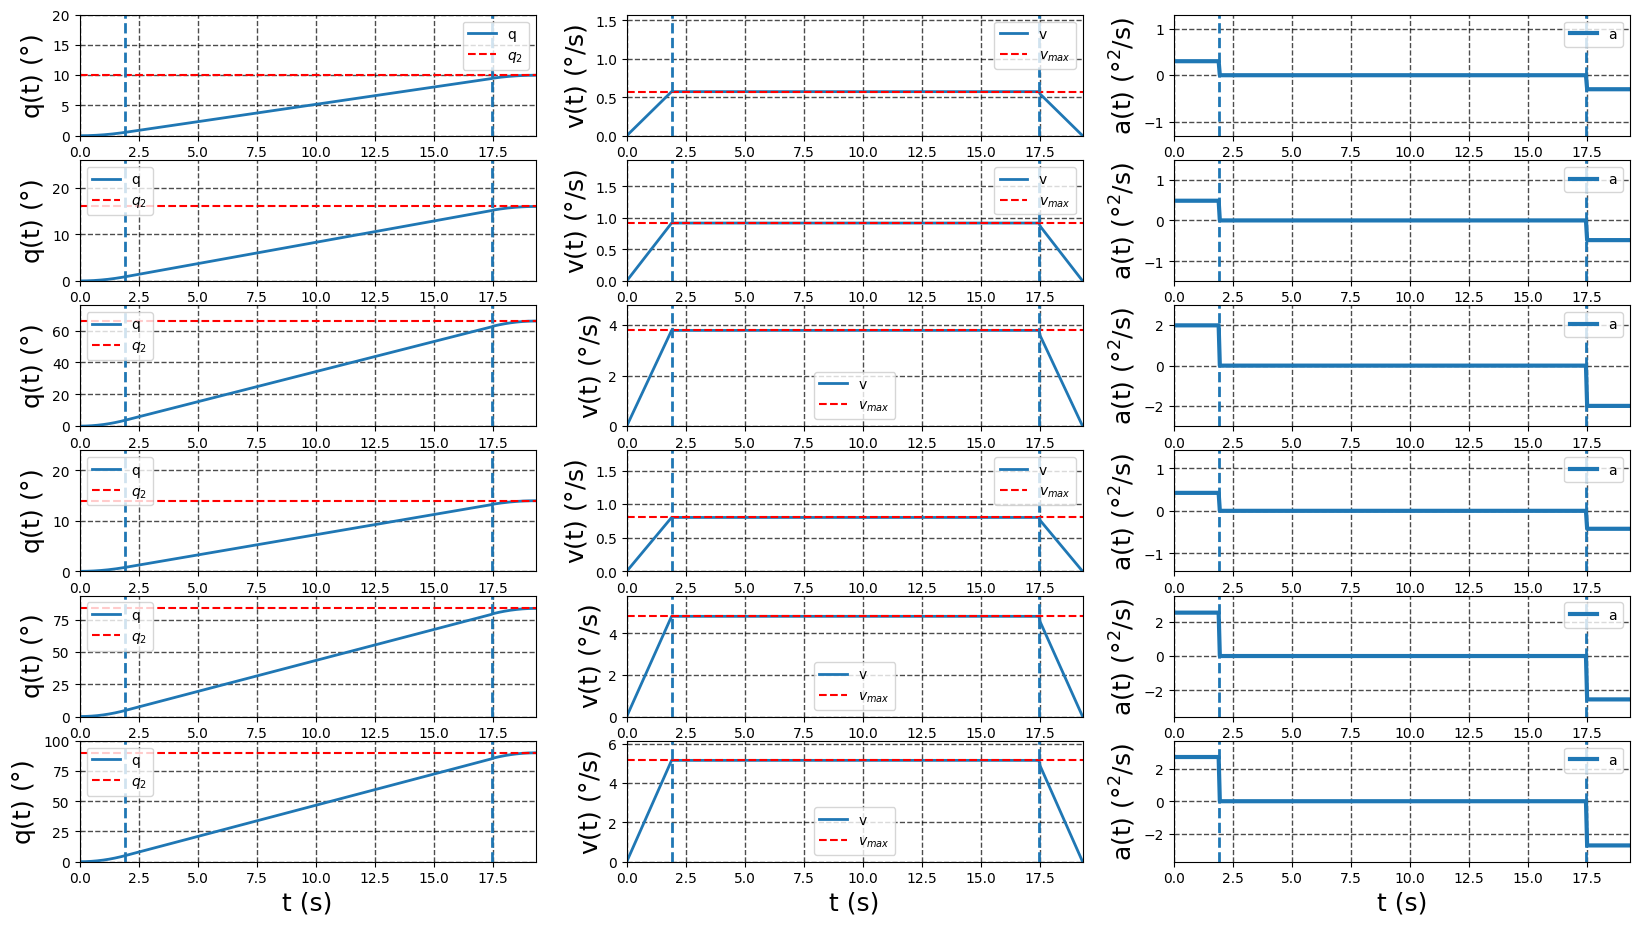

In [132]:
figure(figsize=figsize)
for i in range(6):
    # just coupling all variables in one list
    t,q,v,a = pltmtx[i]
    q0, qf , dq_m, ddq_m = qs[i]
    allparams = [t0,t1,T,tf,t,q,v,a,q0,qf,dq_m,ddq_m,i]
    # and plotting
    plotQ(allparams)
    plotV(allparams)
    plotA(allparams)

In [133]:
# Let's now calculate error
t0,t1,T,tf,t,q,v,a,q0,qf,dq_m,ddq_m,i = allparams_sync
S_sync = T*dq_m
print(T, dq_m)

t0,t1,T,tf,t,q,v,a,q0,qf,dq_m,ddq_m,i = allparams
S_num = T*dq_m
print(T, dq_m)

print('Error = ', S_sync - S_num)

17.420828693386973 5.166229551075513
17.450000000000113 5.157593123209136
Error =  -1.4210854715202004e-14


# Task 5
### Drive your robot model between 2 consequent points.

In [134]:
qs_start = [random.randint(10,90) for i in range(6)]
qs_final = [random.randint(10,90) for i in range(6)]
t_final = random.randint(10,20)
np.array([qs_start,qs_final])

array([[79, 87, 23, 35, 83, 32],
       [42, 37, 12, 23, 41, 90]])

In [135]:
polinom = np.zeros((6,6))
# finding coefficients
for j, i in enumerate(polinom):
    a0 = qs_start[j]
    a1 = a2 = 0
    a3 = 10 * (abs(qs_final[j]-qs_start[j])) / t_final**3
    a4 = -15 * (abs(qs_final[j]-qs_start[j])) / t_final**4
    a5 = 6 * (abs(qs_final[j]-qs_start[j])) / t_final**5
    polinom[j] = [a0,a1,a2,a3,a4,a5]
polinom

array([[ 7.90e+01,  0.00e+00,  0.00e+00,  3.70e-01, -5.55e-02,  2.22e-03],
       [ 8.70e+01,  0.00e+00,  0.00e+00,  5.00e-01, -7.50e-02,  3.00e-03],
       [ 2.30e+01,  0.00e+00,  0.00e+00,  1.10e-01, -1.65e-02,  6.60e-04],
       [ 3.50e+01,  0.00e+00,  0.00e+00,  1.20e-01, -1.80e-02,  7.20e-04],
       [ 8.30e+01,  0.00e+00,  0.00e+00,  4.20e-01, -6.30e-02,  2.52e-03],
       [ 3.20e+01,  0.00e+00,  0.00e+00,  5.80e-01, -8.70e-02,  3.48e-03]])

In [136]:
pltmtx_poly = [0,0,0,0,0,0]
t = np.linspace(0,t_final, 500)
for k in range(6):
    a0, a1, a2, a3, a4, a5 = polinom[k]
    q = []
    v = []
    a = []
    for i in t:
        qt = a0 + a1*i + a2*i**2 + a3*i**3 + a4*i**4 + a5*i**5
        vt = a1 + 2*a2*i + 3*a3*i**2 + 4*a4*i**3 + 5*a5*i**4
        at = 2*a2 + 6*a3*i + 12*a4*i**2 + 20*a5*i**3
        q.append(qt)
        v.append(vt)
        a.append(at)
    pltmtx_poly[k] = [t,q,v,a]

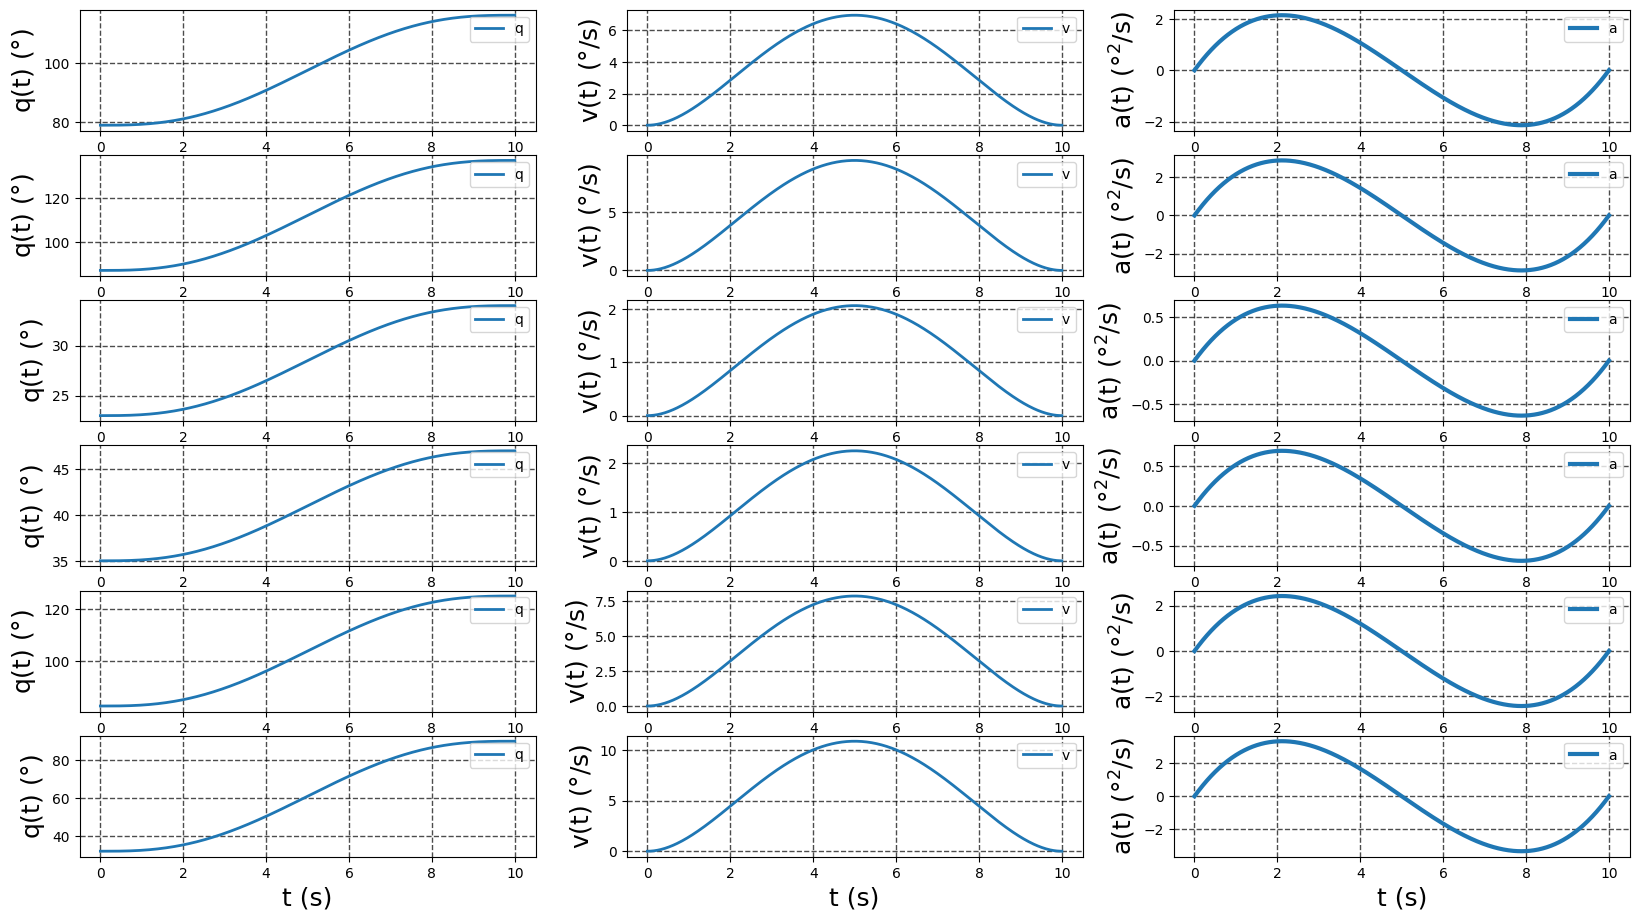

In [137]:
figure(figsize=figsize)
for i in range(6):
    t,q,v,a = pltmtx_poly[i]
    subplot(6, 3, 3*i+1)
    plot(t,q, linewidth=2, label="q")
    xlabel('t (s)', fontsize=18)
    ylabel(r'q(t) ($\degree$)', fontsize=18)
    grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
    grid(True)
    legend()

    subplot(6, 3, 3*i+2)
    plot(t,v, linewidth=2, label="v")
    xlabel('t (s)', fontsize=18)
    ylabel(r'v(t) ($\degree$/s)', fontsize=18)
    grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
    grid(True)
    legend()

    subplot(6, 3, 3*i+3)
    plot(t,a, linewidth=3, label="a")
    xlabel('t (s)', fontsize=18)
    ylabel(r'a(t) ($\degree^2$/s)', fontsize=18)
    grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
    grid(True)
    legend()

# Task 6
### Solve polynomial constraining null value for initial and final acceleration passing through 4 consequent points

In [138]:
qs_1 = [0,0,0,0,0,0]
qs_2 = [random.randint(10,30) for i in range(6)]
qs_3 = [random.randint(10,30) for i in range(6)]
qs_4 = [0,0,0,0,0,0]

t_final = random.randint(10,20)
array_qs = np.array([qs_1,qs_2,qs_3,qs_4])
array_qs

array([[ 0,  0,  0,  0,  0,  0],
       [28, 24, 30, 12, 23, 23],
       [10, 25, 29, 21, 18, 27],
       [ 0,  0,  0,  0,  0,  0]])

In [139]:
t = np.linspace(0,t_final, 500)

In [140]:
def polyn(qs_start,qs_final):
    polinom = np.zeros((6,6))
    # finding coefficients
    for j, i in enumerate(polinom):
        a0 = qs_start[j]
        a1 = a2 = 0
        a3 = 10 * (qs_final[j]-qs_start[j]) / t_final**3
        a4 = -15 * (qs_final[j]-qs_start[j]) / t_final**4
        a5 = 6 * (qs_final[j]-qs_start[j]) / t_final**5
        polinom[j] = [a0,a1,a2,a3,a4,a5]
    return polinom

In [141]:
qs_12 = polyn(array_qs[0], array_qs[1])
qs_23 = polyn(array_qs[1], array_qs[2])
qs_34 = polyn(array_qs[2],array_qs[3])
polinoms = np.array([qs_12,qs_23,qs_34])
polinoms.shape

(3, 6, 6)

In [142]:
def solvingdot2dot(polinoms, t, j):
    pltmtx_poly = [0,0,0,0,0,0]
    polinom = polinoms[j]
    for k in range(6):
        a0, a1, a2, a3, a4, a5 = polinom[k]
        q = []
        v = []
        a = []
        for i in t:
            qt = a0 + a1*i + a2*i**2 + a3*i**3 + a4*i**4 + a5*i**5
            vt = a1 + 2*a2*i + 3*a3*i**2 + 4*a4*i**3 + 5*a5*i**4
            at = 2*a2 + 6*a3*i + 12*a4*i**2 + 20*a5*i**3
            q.append(qt)
            v.append(vt)
            a.append(at)
        pltmtx_poly[k] = [t,q,v,a]
    return pltmtx_poly

In [143]:
pltmtx_poly1 = solvingdot2dot(polinoms,t, 0)
pltmtx_poly2 = solvingdot2dot(polinoms,t, 1)
pltmtx_poly3 = solvingdot2dot(polinoms,t, 2)

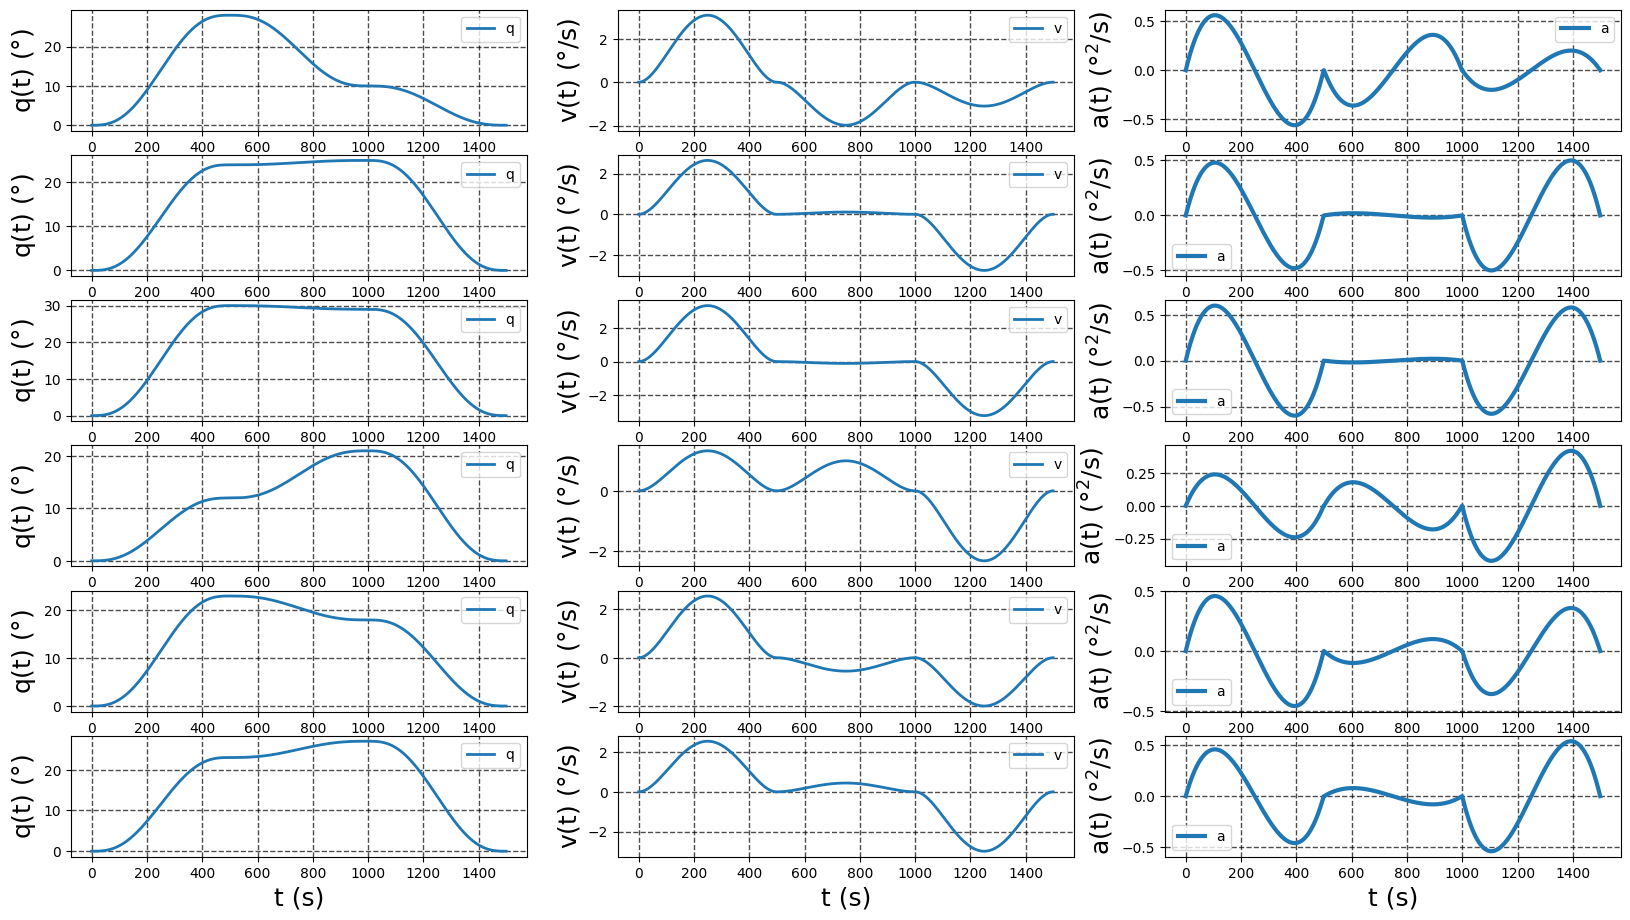

In [144]:
figure(figsize=figsize)
for i in range(6):
    t0,q0,v0,a0= pltmtx_poly1[i]
    t1,q1,v1,a1 = pltmtx_poly2[i]
    t2,q2,v2,a2 = pltmtx_poly3[i]
    q = np.concatenate((q0,q1,q2))
    v = np.concatenate((v0,v1,v2))
    a = np.concatenate((a0,a1,a2))
    subplot(6, 3, 3*i+1)
    plot(q, linewidth=2, label="q")
    xlabel('t (s)', fontsize=18)
    ylabel(r'q(t) ($\degree$)', fontsize=18)
    grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
    grid(True)
    legend()

    subplot(6, 3, 3*i+2)
    plot(v, linewidth=2, label="v")
    xlabel('t (s)', fontsize=18)
    ylabel(r'v(t) ($\degree$/s)', fontsize=18)
    grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
    grid(True)
    legend()

    subplot(6, 3, 3*i+3)
    plot(a, linewidth=3, label="a")
    xlabel('t (s)', fontsize=18)
    ylabel(r'a(t) ($\degree^2$/s)', fontsize=18)
    grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
    grid(True)
    legend()